In [94]:
#
# File: project1.py
#

## top-level submission file

'''
Note: Do not import any other modules here.
        To import from another file xyz.py here, type
        import project1_py.xyz
        However, do not import any modules except numpy in those files.
        It's ok to import modules only in files that are
        not imported here (e.g. for your plotting code).
'''
import numpy as np

def local_descent(x, alpha, d):
    x_next = x + alpha*d
    return x_next

def gradient_descent(x, alpha, g):
    g = g(x)
    d = -g/np.linalg.norm(g)
    x_next = local_descent(x, alpha, d)
    return x_next

def backtrack_line_search(f, g, x, d, alpha, p = .005, B = 1e-12):
    y = f(x)
    while(f(x + alpha*d) > y + B*alpha*(np.dot(g,d))):
        alpha *= p
    return alpha

def gradient_descent_with_line_search(f, x, alpha, g):
    g = g(x)
    d = -g/np.linalg.norm(g)
    alpha = backtrack_line_search(f, g, x, d, alpha)
    x_next = local_descent(x, alpha, d)
    return x_next

def momentum(g, x, v, alpha, B): 
    g = g(x)
    norm_g = g/np.linalg.norm(g)
    v_next = B*v - alpha*norm_g
    x_next = x + v_next
    return x_next, v_next

def nesterov_momentum(g, x, v, alpha, B):
    gr = g(x + B*v)
    norm_gr = gr/np.linalg.norm(gr)
    v_next = B*v - alpha*norm_gr
    x_next = x + v_next
    return x_next, v_next



# def optimize(f, g, x0, n, count, prob):
#     """
#     Args:
#         f (function): Function to be optimized
#         g (function): Gradient function for `f`
#         x0 (np.array): Initial position to start from
#         n (int): Number of evaluations allowed. Remember `g` costs twice of `f`
#         count (function): takes no arguments are returns current count
#         prob (str): Name of the problem. So you can use a different strategy
#                  for each problem. `prob` can be `simple1`,`simple2`,`simple3`,
#                  `secret1` or `secret2`
#     Returns:
#         x_best (np.array): best selection of variables found
#     """

#     x_last = x0
#     v_last = np.zeros(len(x0))
#     while(count() < n):
#         if prob == "simple1": # using nesterov momentum
#             alpha = .1222
#             B = .55
#             x_next, v_next = nesterov_momentum(g, x_last, v_last, alpha, B)
#             x_last = x_next
#             v_last = v_next
#         elif prob == "simple2": # using nesterov momemntum
#             alpha = .11925
#             B = .65
#             x_next, v_next = nesterov_momentum(g, x_last, v_last, alpha, B)
#             x_last = x_next
#             v_last = v_next
#         elif prob == "simple3": # using momentum method
#             alpha = .05
#             B = .2
#             x_next, v_next = momentum(g, x_last, v_last, alpha, B)
#             x_last = x_next
#             v_last = v_next
#         elif prob == "secret1": # using nesterov momentum method
#             alpha = .11925
#             B = .65
#             x_next, v_next = nesterov_momentum(g, x_last, v_last, alpha, B)
#             x_last = x_next
#             v_last = v_next
#         elif prob == "secret2": # using nesterov momentum method
#             alpha = .11925
#             B = .65
#             x_next, v_next = nesterov_momentum(g, x_last, v_last, alpha, B)
#             x_last = x_next
#             v_last = v_next
#         else:
#             return float("nan")
        

#     x_best = x_last
#     return x_best


def optimize(f, g, x0, n, count, prob): # For plotting!
    """
    Args:
        f (function): Function to be optimized
        g (function): Gradient function for `f`
        x0 (np.array): Initial position to start from
        n (int): Number of evaluations allowed. Remember `g` costs twice of `f`
        count (function): takes no arguments are returns current count
        prob (str): Name of the problem. So you can use a different strategy
                 for each problem. `prob` can be `simple1`,`simple2`,`simple3`,
                 `secret1` or `secret2`
    Returns:
        x_best (np.array): best selection of variables found
    """
    
    x_history = [x0]
    f_history = []
    iters = 0

    x_last = x0
    v_last = np.zeros(len(x0))
    while(count() < n):
        iters = iters + 1
        if prob == "simple1": # using nesterov momentum
            alpha = .1222
            B = .55
            x_next, v_next = nesterov_momentum(g, x_last, v_last, alpha, B)
            x_last = x_next
            v_last = v_next
        elif prob == "simple2": # using nesterov momemntum
            alpha = .11925
            B = .65
            x_next, v_next = nesterov_momentum(g, x_last, v_last, alpha, B)
            x_last = x_next
            v_last = v_next
        elif prob == "simple3": # using momentum method
            alpha = .05
            B = .2
            x_next, v_next = momentum(g, x_last, v_last, alpha, B)
            x_last = x_next
            v_last = v_next
        elif prob == "secret1": # using nesterov momentum method
            alpha = .11925
            B = .65
            x_next, v_next = nesterov_momentum(g, x_last, v_last, alpha, B)
            x_last = x_next
            v_last = v_next
        elif prob == "secret2": # using nesterov momentum method
            alpha = .11925
            B = .65
            x_next, v_next = nesterov_momentum(g, x_last, v_last, alpha, B)
            x_last = x_next
            v_last = v_next
        else:
            return float("nan")

        x_history.append(x_last)

        
    for x in x_history:
        f_history.append(f(x))

    x_best = x_last
    return x_best, x_history, f_history, iters

In [150]:
#
# File: helpers.py
#

# this file defines the optimization problems, random search, and test

from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

class OptimizationProblem:

    @property
    def xdim(self):
        # dimension of x
        return self._xdim

    @property
    def prob(self):
        # problem name
        return self._prob
    
    @property
    def n(self):
        # number of allowed evaluations
        return self._n
    
    def _reset(self):
        self._ctr = 0

    def count(self):
        return self._ctr

    def nolimit(self):
        # sets n to inf, useful for plotting/debugging
        self._n = np.inf
        
    def x0(self):
        '''
        Returns:
            x0 (np.array): (xdim,) randomly initialized x
        '''
        return np.random.randn(self.xdim)

    def f(self, x):
        '''Evaluate f
        Args:
            x (np.array): input
        Returns:
            f (float): evaluation
        '''
        self._ctr += 1

        return self._wrapped_f(x)
    
    def _wrapped_f(self, x):
        raise NotImplementedError

    def g(self, x):
        '''Evaluate jacobian of f
        Args:
            x (np.array): input
        Returns:
            jac (np.array): jacobian of f wrt x
        '''
        self._ctr += 2

        return self._wrapped_g(x)

    def _wrapped_g(self, x):
        raise NotImplementedError


class Simple1(OptimizationProblem):
    '''
    Rosenbrock's Function
    '''
    
    def __init__(self):
        self._xdim = 2
        self._prob = 'simple1'
        self._n = 20
        self._reset()

    def x0(self):
        return np.clip(np.random.randn(self.xdim), -3, 3)

    def _wrapped_f(self, x):
        return 100*(x[1]-x[0]**2)**2 + (1-x[0])**2

    def _wrapped_g(self, x):
        return np.array([
            2*(-1 + x[0] + 200*x[0]**3 - 200*x[0]*x[1]),
            200*(-x[0]**2 + x[1])
                ])

class Simple2(OptimizationProblem):
    '''
    Himmelblau's Function
    '''

    def __init__(self):
        self._xdim = 2
        self._prob = 'simple2'
        self._n = 40
        self._reset()

    def x0(self):
        return np.clip(np.random.randn(self.xdim), -3, 3)

    def _wrapped_f(self, x):
        y = x[1]
        x = x[0]
        return (x**2 + y - 11)**2 + (x + y**2 - 7)**2

    def _wrapped_g(self, x):
        y = x[1]
        x = x[0]
        return np.array([
            2*(2*x*(x**2 + y - 11) + x + y**2 - 7),
            2*(x**2 + 2*y*(x + y**2 - 7) + y - 11)
                ])

class Simple3(OptimizationProblem):
    '''
    Powell's function
    '''

    def __init__(self):
        self._xdim = 4
        self._prob = 'simple3'
        self._n = 100
        self._reset()

    def x0(self):
        return np.clip(np.random.randn(self.xdim), -3, 3)

    def _wrapped_f(self, x):
        w = x[0]
        z = x[3]
        y = x[2]
        x = x[1]
        return (w + 10*x)**2 + 5*(y-z)**2 + (x-2*y)**4 + 10*(w-z)**4

    def _wrapped_g(self, x):
        w = x[0]
        z = x[3]
        y = x[2]
        x = x[1]
        return np.array([
            2*(20*(w - z)**3 + w + 10*x),
            4*(5*(w + 10*x) + (x - 2*y)**3),
            10*(y - z) - 8*(x - 2*y)**3,
            10*(-4*(w-z)**3 - y + z)
                ])


def optimize_random(f, g, x0, n, count, prob):
    """ Optimizer using random search.
    Args:
        f (function): Function to be optimized
        g (function): Gradient function for `f`
        x0 (np.array): Initial position to start from
        n (int): Number of evaluations allowed. Remember `g` costs twice of `f`
        count (function): takes no arguments are reutrns current count
        prob (str): Name of the problem. So you can use a different strategy 
                 for each problem. `prob` can be `simple1`,`simple2`,`simple3`,
                 `secret1` or `secret2`
    Returns:
        x_best (np.array): best selection of variables found
    """
    xs = [x0 + np.random.randn(*x0.shape) for i in range(n)]
    fs = [f(x) for x in xs]
    i = np.argmin(fs)
    x_best = xs[i]

    return x_best



def test_optimize(optimize):
    '''
    Tests optimize to ensure it returns a+b
    Args:
        optimize (function): function for adding a+b
    '''

    for test in [Simple1, Simple2, Simple3]:

        p = test()
        print('Testing on %s...' % p.prob)

        # test random
        print('Testing random search...')
        fvals_random = []
        for seed in tqdm(range(500)):
            p = test()
            np.random.seed(seed)
            x0 = p.x0()
            xb = optimize_random(p.f, p.g, x0, p.n, p.count, p.prob)
            p._reset()
            fvals_random.append(p.f(xb))

        # test optimize
        print('Testing optimize...')
        fvals_opt = []
        any_count_exceeded = False
        for seed in tqdm(range(500)):
            p = test()
            # p.nolimit() # for plotting
            np.random.seed(seed)
            x0 = p.x0()
            xb = optimize(p.f, p.g, x0, p.n, p.count, p.prob) 
            if p.count() > p.n:
                any_count_exceeded = True
            p._reset()
            fvals_opt.append(p.f(xb))
        
        if np.any(np.isnan(fvals_opt)):
            print('Warning: NaN returned by optimizer. Leaderboard score will be 0.')
            fvals_opt = np.where(np.isnan(fvals_opt), np.inf, fvals_opt)

        if any_count_exceeded:
            print('Failed %s. Count exceeded.'%p.prob)
            continue

        better = np.array(fvals_random) > np.array(fvals_opt)

        # to pass, optimize must find a better optimimum than random
        # search over at least 55% of seeds.
        frac = np.mean(better)
        if frac > 0.55:
            print('Pass: optimize does better than random search on %s %.3f pct of the time.' % (p.prob,frac*100))
        else:
            print('Fail: optimize is only random search on %s %.3f pct of the time.' % (p.prob,frac*100))

    return
    
def Rosenbrock_plot(optimize, x0):
    test = Simple1
    p = test()
    numpoints = 100
    x1 = np.linspace(-1.0, 2.0, numpoints)
    x2 = np.linspace(-2.0, 2.0, numpoints)
    X1, X2 = np.meshgrid(x1, x2)
    Z = (100*(X2 - X1**2)**2) + ((1-X1)**2)

    plt.contour(X1,X2,Z,np.logspace(-0.5,3.5,8,base=10), cmap = 'gray')

    plt.title('Optimization Path for Rosenbrock Function with x0 = ' + str(x0))
    plt.xlabel('x1')
    plt.ylabel('x2')

    xb, x_history, f_history, iters = optimize(p.f, p.g, x0, p.n, p.count, p.prob)
    x_hist = np.array(x_history)
    x1_opt = x_hist[:,0]
    x2_opt = x_hist[:,1]
    plt.plot(x1_opt, x2_opt, '.-', fillstyle = 'none') 
    p._reset()
    return

def convergence_plots(optimize, init_points, Simple, name):
    test = Simple
    p = test()
    for x0 in init_points:
        xb, x_history, f_history, iters = optimize(p.f, p.g, x0, p.n, p.count, p.prob)
        plt.plot(np.array(f_history), label = 'x0 = ' + str(x0))
        p._reset()
    plt.xlabel('Iterations')
    plt.ylabel('Function value f(x)')
    plt.title(name + ' Convergence Plot')
    plt.legend(loc = "upper right")
    plt.show()
    return





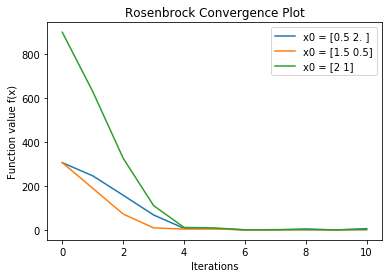

In [151]:
# Rosenbrock Convergence Plot
x0_1 = np.array([.5,2.0])
x0_2 = np.array([1.5,0.5])
x0_3 = np.array([2,1])
init_points = [x0_1, x0_2, x0_3]
convergence_plots(optimize, init_points, Simple1, 'Rosenbrock')


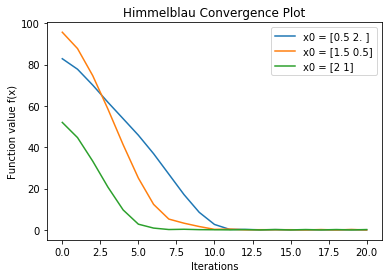

In [153]:
# Himmelblau Convergence Plot
x0_1 = np.array([.5,2.0])
x0_2 = np.array([1.5,0.5])
x0_3 = np.array([2,1])
init_points = [x0_1, x0_2, x0_3]
convergence_plots(optimize, init_points, Simple2, 'Himmelblau')

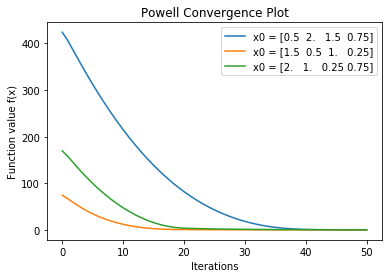

In [155]:
# Powell Convergence Plot
x0_1 = np.array([.5, 2.0, 1.5, .75])
x0_2 = np.array([1.5, 0.5, 1.0, .25])
x0_3 = np.array([2, 1, .25, .75])
init_points = [x0_1, x0_2, x0_3]
convergence_plots(optimize, init_points, Simple3, 'Powell')

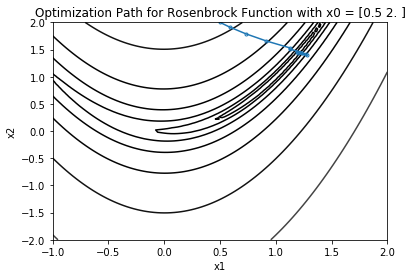

In [100]:
x0 = np.array([.5,2.0])
Rosenbrock_plot(optimize, x0)

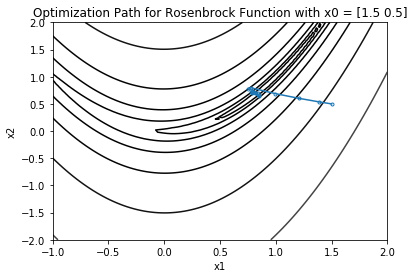

In [118]:
x0 = np.array([1.5,0.5])
Rosenbrock_plot(optimize, x0)

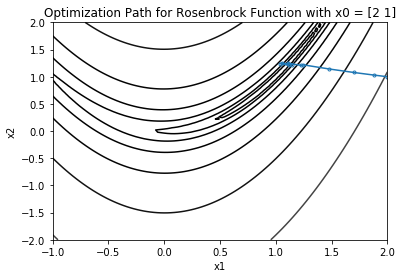

In [96]:
x0 = np.array([2,1])
Rosenbrock_plot(optimize, x0)
